In [62]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('btcgbp-m5-bid-2023-03-14T15-03-2026-02-01.csv')
df

,timestamp,open,high,low,close,volume
0,1678806300000,21251.7,21311.8,21251.4,21296.7,0.0025
1,1678806600000,21321.2,21325.8,21270.5,21288.7,0.0020
2,1678806900000,21289.0,21357.1,21288.5,21293.7,0.0025
3,1678807200000,21296.5,21339.9,21279.0,21307.8,0.0030
4,1678807500000,21315.8,21316.4,21258.6,21260.1,0.0038
...,...,...,...,...,...,...
274253,1769902500000,57790.6,57826.6,57601.9,57635.8,0.0005
274254,1769902800000,57633.6,57713.3,57525.5,57581.3,0.0005
274255,1769903100000,57587.1,57597.5,57444.5,57508.4,0.0005
274256,1769903400000,57513.9,57656.7,57512.3,57525.3,0.0004


In [64]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df

,timestamp,open,high,low,close,volume
0,2023-03-14 15:05:00,21251.7,21311.8,21251.4,21296.7,0.0025
1,2023-03-14 15:10:00,21321.2,21325.8,21270.5,21288.7,0.0020
2,2023-03-14 15:15:00,21289.0,21357.1,21288.5,21293.7,0.0025
3,2023-03-14 15:20:00,21296.5,21339.9,21279.0,21307.8,0.0030
4,2023-03-14 15:25:00,21315.8,21316.4,21258.6,21260.1,0.0038
...,...,...,...,...,...,...
274253,2026-01-31 23:35:00,57790.6,57826.6,57601.9,57635.8,0.0005
274254,2026-01-31 23:40:00,57633.6,57713.3,57525.5,57581.3,0.0005
274255,2026-01-31 23:45:00,57587.1,57597.5,57444.5,57508.4,0.0005
274256,2026-01-31 23:50:00,57513.9,57656.7,57512.3,57525.3,0.0004


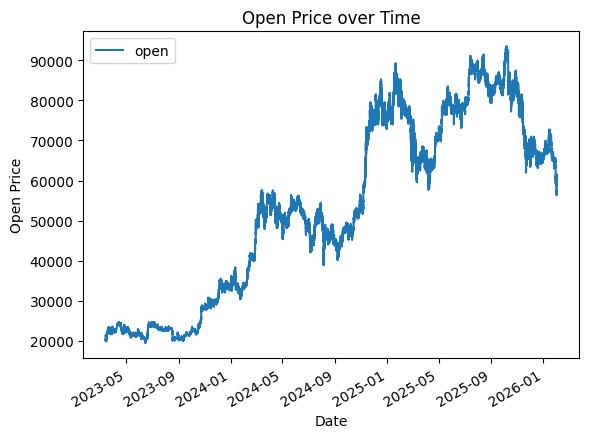

In [65]:
df.plot(x='timestamp', y='open')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price over Time')
plt.show()

In [66]:
# Define the 14-period RSI feature: RSI = 100 - (100 / (1 + (average gain / average loss)))
period = 14
df['rsi'] = 100 - (100 / (1 + (df['close'].diff().clip(lower=0).rolling(window=period).mean() / df['close'].diff().clip(upper=0).abs().rolling(window=period).mean())))
df

,timestamp,open,high,low,close,volume,rsi
0,2023-03-14 15:05:00,21251.7,21311.8,21251.4,21296.7,0.0025,NaN
1,2023-03-14 15:10:00,21321.2,21325.8,21270.5,21288.7,0.0020,NaN
2,2023-03-14 15:15:00,21289.0,21357.1,21288.5,21293.7,0.0025,NaN
3,2023-03-14 15:20:00,21296.5,21339.9,21279.0,21307.8,0.0030,NaN
4,2023-03-14 15:25:00,21315.8,21316.4,21258.6,21260.1,0.0038,NaN
...,...,...,...,...,...,...,...
274253,2026-01-31 23:35:00,57790.6,57826.6,57601.9,57635.8,0.0005,62.227845
274254,2026-01-31 23:40:00,57633.6,57713.3,57525.5,57581.3,0.0005,60.936960
274255,2026-01-31 23:45:00,57587.1,57597.5,57444.5,57508.4,0.0005,61.557716
274256,2026-01-31 23:50:00,57513.9,57656.7,57512.3,57525.3,0.0004,64.610019


In [67]:
# Define the Exponential Moving Average (EMA) feature: EMA = (Close * K) + (Prev EMA * (1 - K)), where K = 2 / (N + 1) and N is the number of periods
def calculate_ema(series, period):
    ema = series.ewm(span=period, adjust=False).mean()
    return ema

df['ema_20'] = calculate_ema(df['close'], 20)
df['ema_50'] = calculate_ema(df['close'], 50)
df['ema_200'] = calculate_ema(df['close'], 200)
df


,timestamp,open,high,low,close,volume,rsi,ema_20,ema_50,ema_200
0,2023-03-14 15:05:00,21251.7,21311.8,21251.4,21296.7,0.0025,NaN,21296.700000,21296.700000,21296.700000
1,2023-03-14 15:10:00,21321.2,21325.8,21270.5,21288.7,0.0020,NaN,21295.938095,21296.386275,21296.620398
2,2023-03-14 15:15:00,21289.0,21357.1,21288.5,21293.7,0.0025,NaN,21295.724943,21296.280930,21296.591339
3,2023-03-14 15:20:00,21296.5,21339.9,21279.0,21307.8,0.0030,NaN,21296.874949,21296.732659,21296.702868
4,2023-03-14 15:25:00,21315.8,21316.4,21258.6,21260.1,0.0038,NaN,21293.372573,21295.296084,21296.338661
...,...,...,...,...,...,...,...,...,...,...
274253,2026-01-31 23:35:00,57790.6,57826.6,57601.9,57635.8,0.0005,62.227845,57311.443101,57241.009739,58590.111637
274254,2026-01-31 23:40:00,57633.6,57713.3,57525.5,57581.3,0.0005,60.936960,57337.143758,57254.354455,58580.073711
274255,2026-01-31 23:45:00,57587.1,57597.5,57444.5,57508.4,0.0005,61.557716,57353.453876,57264.317025,58569.410291
274256,2026-01-31 23:50:00,57513.9,57656.7,57512.3,57525.3,0.0004,64.610019,57369.820174,57274.551652,58559.021133


In [68]:
# Define volatility based indicators
def calc_volatility(series, period):
    return series.rolling(window=period).std()

df['volatility_20'] = calc_volatility(df['close'], 20)
df['volatility_50'] = calc_volatility(df['close'], 50)
df['volatility_200'] = calc_volatility(df['close'], 200)

def calc_bollinger_bands(series, period):
    sma = series.rolling(window=period).mean()
    std = series.rolling(window=period).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return upper_band, lower_band

df['bollinger_upper_20'], df['bollinger_lower_20'] = calc_bollinger_bands(df['close'], 20)
df['bollinger_upper_50'], df['bollinger_lower_50'] = calc_bollinger_bands(df['close'], 50)
df['bollinger_upper_200'], df['bollinger_lower_200'] = calc_bollinger_bands(df['close'], 200)
df

,timestamp,open,high,low,close,volume,rsi,ema_20,ema_50,ema_200,volatility_20,volatility_50,volatility_200,bollinger_upper_20,bollinger_lower_20,bollinger_upper_50,bollinger_lower_50,bollinger_upper_200,bollinger_lower_200
0,2023-03-14 15:05:00,21251.7,21311.8,21251.4,21296.7,0.0025,NaN,21296.700000,21296.700000,21296.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-14 15:10:00,21321.2,21325.8,21270.5,21288.7,0.0020,NaN,21295.938095,21296.386275,21296.620398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-14 15:15:00,21289.0,21357.1,21288.5,21293.7,0.0025,NaN,21295.724943,21296.280930,21296.591339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-14 15:20:00,21296.5,21339.9,21279.0,21307.8,0.0030,NaN,21296.874949,21296.732659,21296.702868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-14 15:25:00,21315.8,21316.4,21258.6,21260.1,0.0038,NaN,21293.372573,21295.296084,21296.338661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274253,2026-01-31 23:35:00,57790.6,57826.6,57601.9,57635.8,0.0005,62.227845,57311.443101,57241.009739,58590.111637,262.507468,337.809391,1664.518819,57788.569937,56738.540063,57643.598782,56292.361218,62357.764137,55699.688863
274254,2026-01-31 23:40:00,57633.6,57713.3,57525.5,57581.3,0.0005,60.936960,57337.143758,57254.354455,58580.073711,271.834455,345.198840,1660.613359,57820.488911,56733.151089,57677.305680,56296.510320,62331.975218,55689.521782
274255,2026-01-31 23:45:00,57587.1,57597.5,57444.5,57508.4,0.0005,61.557716,57353.453876,57264.317025,58569.410291,275.435321,344.647504,1657.075547,57844.415643,56742.674357,57697.005008,56318.414992,62306.749595,55678.447405
274256,2026-01-31 23:50:00,57513.9,57656.7,57512.3,57525.3,0.0004,64.610019,57369.820174,57274.551652,58559.021133,276.353048,347.682792,1653.065022,57867.231096,56761.818904,57721.137584,56330.406416,62280.519543,55668.259457


In [69]:
# Define Volume-based indicators
# Define the Volume Weighted Average Price (VWAP) feature: VWAP = (Sum of (Price * Volume)) / (Sum of Volume). Reset VWAP at the start of each trading day.
def calculate_vwap(df):
    df['VWAP'] = (df['close'] * df['volume']).cumsum() / df['volume'].cumsum()
    df['VWAP'] = df.groupby(df['timestamp'].dt.date)['VWAP'].transform(lambda x: x.iloc[0] if not x.empty else 0)
    return df

df = calculate_vwap(df)
df

,timestamp,open,high,low,close,volume,rsi,ema_20,ema_50,ema_200,volatility_20,volatility_50,volatility_200,bollinger_upper_20,bollinger_lower_20,bollinger_upper_50,bollinger_lower_50,bollinger_upper_200,bollinger_lower_200,VWAP
0,2023-03-14 15:05:00,21251.7,21311.8,21251.4,21296.7,0.0025,NaN,21296.700000,21296.700000,21296.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21296.700000
1,2023-03-14 15:10:00,21321.2,21325.8,21270.5,21288.7,0.0020,NaN,21295.938095,21296.386275,21296.620398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21296.700000
2,2023-03-14 15:15:00,21289.0,21357.1,21288.5,21293.7,0.0025,NaN,21295.724943,21296.280930,21296.591339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21296.700000
3,2023-03-14 15:20:00,21296.5,21339.9,21279.0,21307.8,0.0030,NaN,21296.874949,21296.732659,21296.702868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21296.700000
4,2023-03-14 15:25:00,21315.8,21316.4,21258.6,21260.1,0.0038,NaN,21293.372573,21295.296084,21296.338661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21296.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274253,2026-01-31 23:35:00,57790.6,57826.6,57601.9,57635.8,0.0005,62.227845,57311.443101,57241.009739,58590.111637,262.507468,337.809391,1664.518819,57788.569937,56738.540063,57643.598782,56292.361218,62357.764137,55699.688863,45890.775083
274254,2026-01-31 23:40:00,57633.6,57713.3,57525.5,57581.3,0.0005,60.936960,57337.143758,57254.354455,58580.073711,271.834455,345.198840,1660.613359,57820.488911,56733.151089,57677.305680,56296.510320,62331.975218,55689.521782,45890.775083
274255,2026-01-31 23:45:00,57587.1,57597.5,57444.5,57508.4,0.0005,61.557716,57353.453876,57264.317025,58569.410291,275.435321,344.647504,1657.075547,57844.415643,56742.674357,57697.005008,56318.414992,62306.749595,55678.447405,45890.775083
274256,2026-01-31 23:50:00,57513.9,57656.7,57512.3,57525.3,0.0004,64.610019,57369.820174,57274.551652,58559.021133,276.353048,347.682792,1653.065022,57867.231096,56761.818904,57721.137584,56330.406416,62280.519543,55668.259457,45890.775083


In [ ]:
df.dropna(inplace=True)
df.to_csv('processed_btcgbp_m5.csv', index=False)
df

,timestamp,open,high,low,close,volume,rsi,ema_20,ema_50,ema_200,volatility_20,volatility_50,volatility_200,bollinger_upper_20,bollinger_lower_20,bollinger_upper_50,bollinger_lower_50,bollinger_upper_200,bollinger_lower_200,VWAP
199,2023-03-15 07:40:00,20431.1,20468.2,20416.4,20462.7,0.0021,63.664278,20427.846983,20414.963914,20560.475262,40.766708,47.161109,374.191911,20498.968416,20335.901584,20502.536218,20313.891782,21286.195821,19789.428179,20852.726709
200,2023-03-15 07:45:00,20462.6,20477.4,20438.6,20477.2,0.0017,60.313024,20432.547270,20417.404545,20559.646652,38.334684,47.715150,370.306830,20501.049368,20347.710632,20505.902300,20315.041700,21274.328160,19793.100840,20852.726709
201,2023-03-15 07:50:00,20477.4,20486.8,20449.8,20475.7,0.0020,51.698867,20436.657054,20419.690641,20558.811362,36.049507,47.841237,366.419318,20502.619014,20358.420986,20508.618475,20317.253525,21262.488136,19796.810864,20852.726709
202,2023-03-15 07:55:00,20466.8,20544.1,20454.4,20511.9,0.0023,69.602446,20443.823049,20423.306695,20558.344583,33.858352,48.805046,362.375233,20506.796704,20371.363296,20513.892092,20318.671908,21250.490966,19800.990034,20852.726709
203,2023-03-15 08:00:00,20511.8,20540.4,20495.9,20516.7,0.0032,74.638137,20450.763711,20426.969177,20557.930209,29.366144,49.719156,358.088038,20506.657287,20389.192713,20519.154311,20320.277689,21237.961076,19805.608924,20852.726709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274253,2026-01-31 23:35:00,57790.6,57826.6,57601.9,57635.8,0.0005,62.227845,57311.443101,57241.009739,58590.111637,262.507468,337.809391,1664.518819,57788.569937,56738.540063,57643.598782,56292.361218,62357.764137,55699.688863,45890.775083
274254,2026-01-31 23:40:00,57633.6,57713.3,57525.5,57581.3,0.0005,60.936960,57337.143758,57254.354455,58580.073711,271.834455,345.198840,1660.613359,57820.488911,56733.151089,57677.305680,56296.510320,62331.975218,55689.521782,45890.775083
274255,2026-01-31 23:45:00,57587.1,57597.5,57444.5,57508.4,0.0005,61.557716,57353.453876,57264.317025,58569.410291,275.435321,344.647504,1657.075547,57844.415643,56742.674357,57697.005008,56318.414992,62306.749595,55678.447405,45890.775083
274256,2026-01-31 23:50:00,57513.9,57656.7,57512.3,57525.3,0.0004,64.610019,57369.820174,57274.551652,58559.021133,276.353048,347.682792,1653.065022,57867.231096,56761.818904,57721.137584,56330.406416,62280.519543,55668.259457,45890.775083


: 